This project analyzes sales data to uncover trends, such as:

Monthly sales performance.
Top-selling products.
Regional performance.

Key Features:
Data Cleaning: Handles missing and inconsistent data.
Visualizations: Generates insightful charts for better understanding.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = 'sales_06_FY2020-21.csv'
data = pd.read_csv(data_path, low_memory=False)

In [5]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')  # Convert order_date to datetime

In [6]:
# Handle missing or invalid dates
data = data.dropna(subset=['order_date'])

In [7]:
# Add new time-related columns
data['year_month'] = data['order_date'].dt.to_period('M')
data['month'] = data['order_date'].dt.month_name()
data['year'] = data['order_date'].dt.year

In [8]:
# Sales Analysis
# Aggregate sales by month and year
monthly_sales = data.groupby('year_month')['total'].sum().reset_index()

In [9]:
# Top-selling products
product_sales = data.groupby('sku')['total'].sum().sort_values(ascending=False).head(10).reset_index()

In [10]:
# Regional performance
region_sales = data.groupby('Region')['total'].sum().sort_values(ascending=False).reset_index()

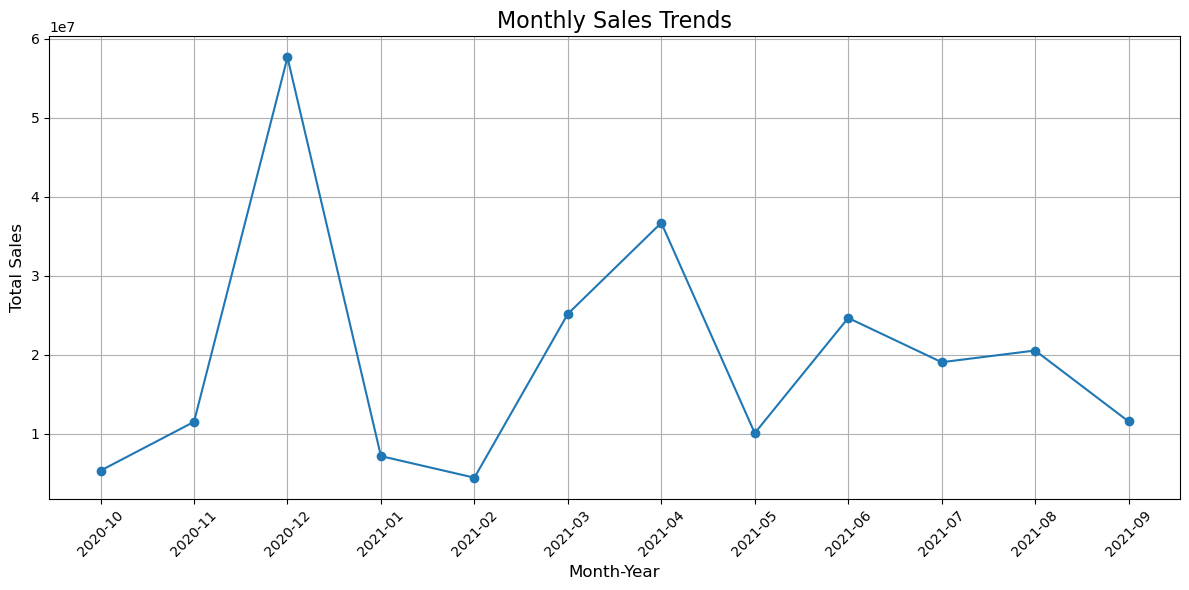

In [11]:
# Visualization
# Monthly Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'].astype(str), monthly_sales['total'], marker='o')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

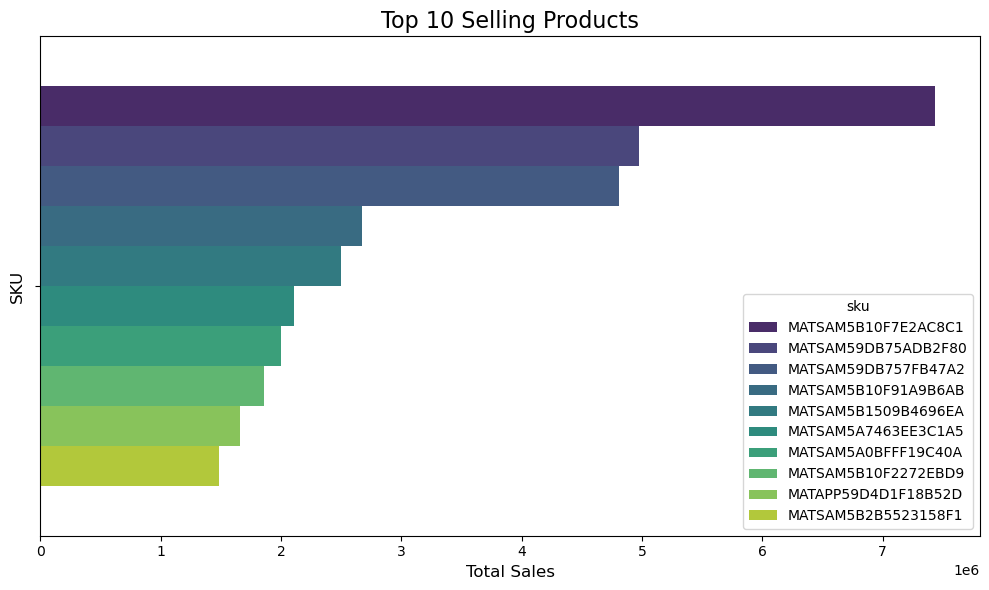

In [13]:
# Top-selling products visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='total', hue='sku', data=product_sales, palette='viridis')
plt.title('Top 10 Selling Products', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('SKU', fontsize=12)
plt.tight_layout()
plt.show()

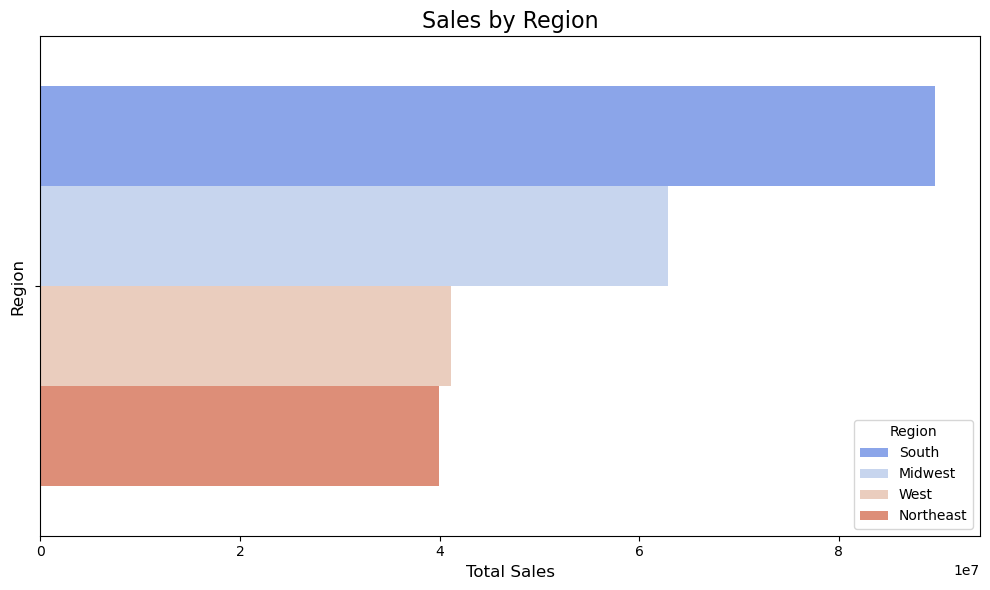

In [15]:
# Regional performance visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='total', hue='Region', data=region_sales, palette='coolwarm')
plt.title('Sales by Region', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
# Save the cleaned data
cleaned_data_path = 'cleaned_sales_data.csv'
data.to_csv(cleaned_data_path, index=False)